In [93]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [94]:
import warnings
warnings.filterwarnings('ignore')

# Part 1: London’s underground resilience

## I. Topological network

In [95]:
# Create an undirected graph of the London Underground.
G = nx.read_graphml('london_tubenetwork.graphml')

In [96]:
# Since coords tuples are stored as string, need to convert them back to tuples using eval().
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [97]:
# Add the stations name to the edge attributes from the nodes attributes.
nod_name1 = {(e1,e2):(G.nodes[e1]['station_name']) for e1, e2 in G.edges()}
nod_name2 = {(e1,e2):(G.nodes[e2]['station_name']) for e1, e2 in G.edges()}

nx.set_edge_attributes(G, nod_name1, 'station_1_')
nx.set_edge_attributes(G, nod_name2, 'station_2_')

In [98]:
# Check the data.
df_1 = nx.to_pandas_edgelist(G)
df_1[0:10]

,source,target,length,station_2_,name,line_id,station_1_
0,910GCAMHTH,910GBTHNLGR,1076.082201,Bethnal Green,London Overground,LeaValleyLine1,Cambridge Heath
1,910GCAMHTH,910GLONFLDS,970.949720,London Fields,London Overground,LeaValleyLine2,Cambridge Heath
2,910GBTHNLGR,910GLIVST,1813.304143,Liverpool Street (Rail),London Overground,LivStBeth,Bethnal Green
3,910GBTHNLGR,940GZZLUBLG,481.514661,Bethnal Green,NaN,NaN,Bethnal Green
4,910GLONFLDS,910GHAKNYNM,917.502798,Hackney Downs,London Overground,LeaValleyLine3,London Fields
5,910GHAKNYNM,910GRCTRYRD,1178.231752,Rectory Road,London Overground,LeaValleyLine4,Hackney Downs
6,910GHAKNYNM,910GCLAPTON,1432.298268,Clapton,London Overground,ChingfordSpur1,Hackney Downs
7,910GRCTRYRD,910GSTKNWNG,775.442407,Stoke Newington,London Overground,LeaValleyLine5,Rectory Road
8,910GSTKNWNG,910GSTMFDHL,1200.722885,Stamford Hill,London Overground,LeaValleyLine6,Stoke Newington
9,910GSTMFDHL,910GSEVNSIS,1001.203674,Seven Sisters (Rail),London Overground,LeaValleyLine7,Stamford Hill


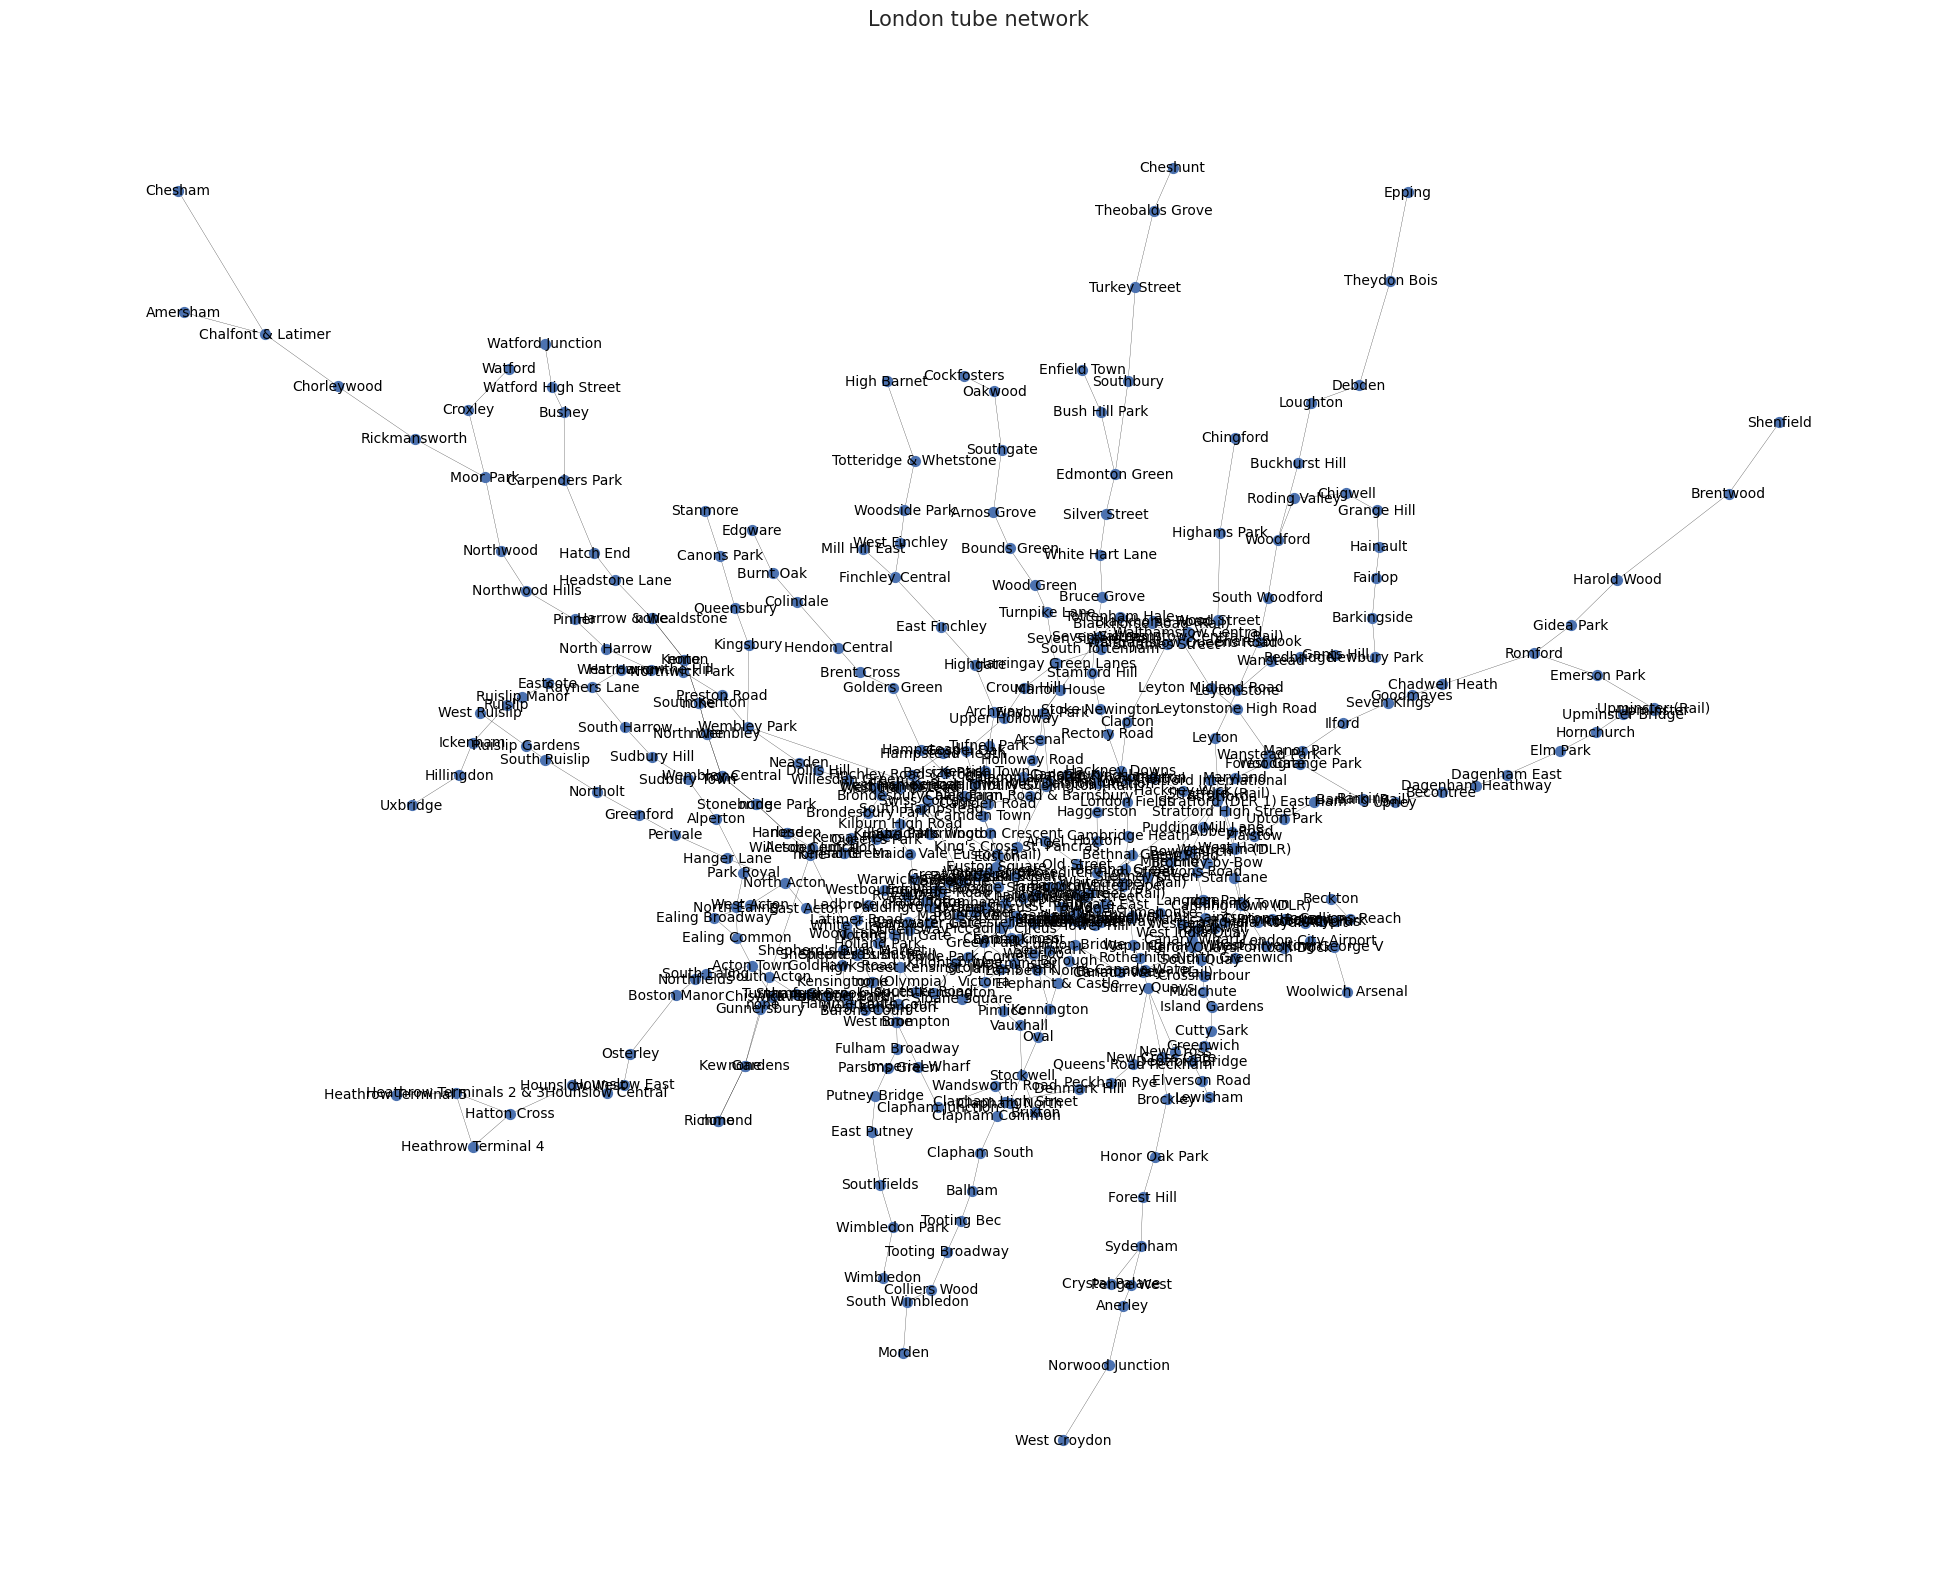

In [99]:
# Plot the tube network with the names of the stations as labels.
fig, ax = plt.subplots(figsize=(25, 20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='b')
nx.draw_networkx_edges(G, pos, arrows=False, width=0.2)
nx.draw_networkx_labels(G, pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network", fontsize=15)
plt.axis("off")
plt.show()

### I.1. Centrality measures

First try multiple centrality measures and then select the most appropriate three.

#### Degree Centrality

In [100]:
# Calculate the degree centrality.
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_london), 'degree')

In [101]:
# To dataframe using the nodes as the index.
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,station_name,degree
940GZZLUKSX,King's Cross St. Pancras,0.016018
940GZZLUBST,Baker Street,0.016018
940GZZLUOXC,Oxford Circus,0.013730
940GZZLUGPK,Green Park,0.013730
940GZZLUBNK,Bank,0.013730
940GZZLUECT,Earl's Court,0.013730
940GZZLUWLO,Waterloo,0.013730
940GZZLUTNG,Turnham Green,0.011442
940GZZDLCGT,Canning Town (DLR),0.011442
940GZZLULVT,Liverpool Street,0.011442


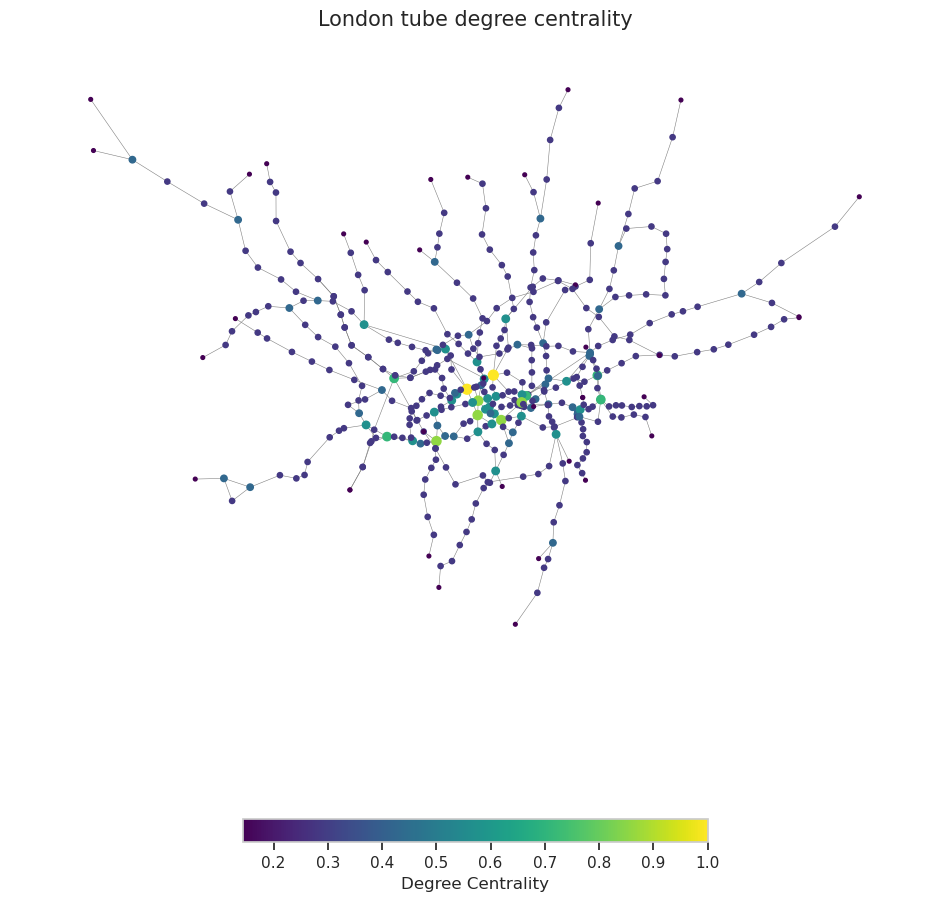

In [119]:
# Set colour and size of nodes according to degree values.
degree_values = [(i[1]['degree']) for i in G.nodes(data=True)]
deg_color = [(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size = [(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph.

pos = pos

fig, ax = plt.subplots(figsize = (12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=deg_color, 
                             cmap=plt.cm.viridis, 
                             node_size=deg_size)

plt.colorbar(nod, label="Degree Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality", fontsize=15)
plt.show()

#### Betweenness Centrality

In [104]:
# Calculate the betweenness centrality.
bet_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G,bet_london,'betweenness')

In [105]:
# Add betweenness centrality to dataframe.
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

df_sorted = df.sort_values(["betweenness"], ascending=False)
df_sorted[0:10]

,station_name,degree,betweenness
940GZZLUBST,Baker Street,0.016018,0.381015
940GZZLUBLG,Bethnal Green,0.006865,0.353433
940GZZLUFYR,Finchley Road,0.009153,0.336582
940GZZLUBNK,Bank,0.013730,0.319563
940GZZLUGPK,Green Park,0.013730,0.319552
940GZZLUWLO,Waterloo,0.013730,0.317216
940GZZLULVT,Liverpool Street,0.011442,0.313026
940GZZLUWSM,Westminster,0.009153,0.289962
940GZZLUBND,Bond Street,0.009153,0.258599
910GWHMDSTD,West Hampstead,0.006865,0.236566


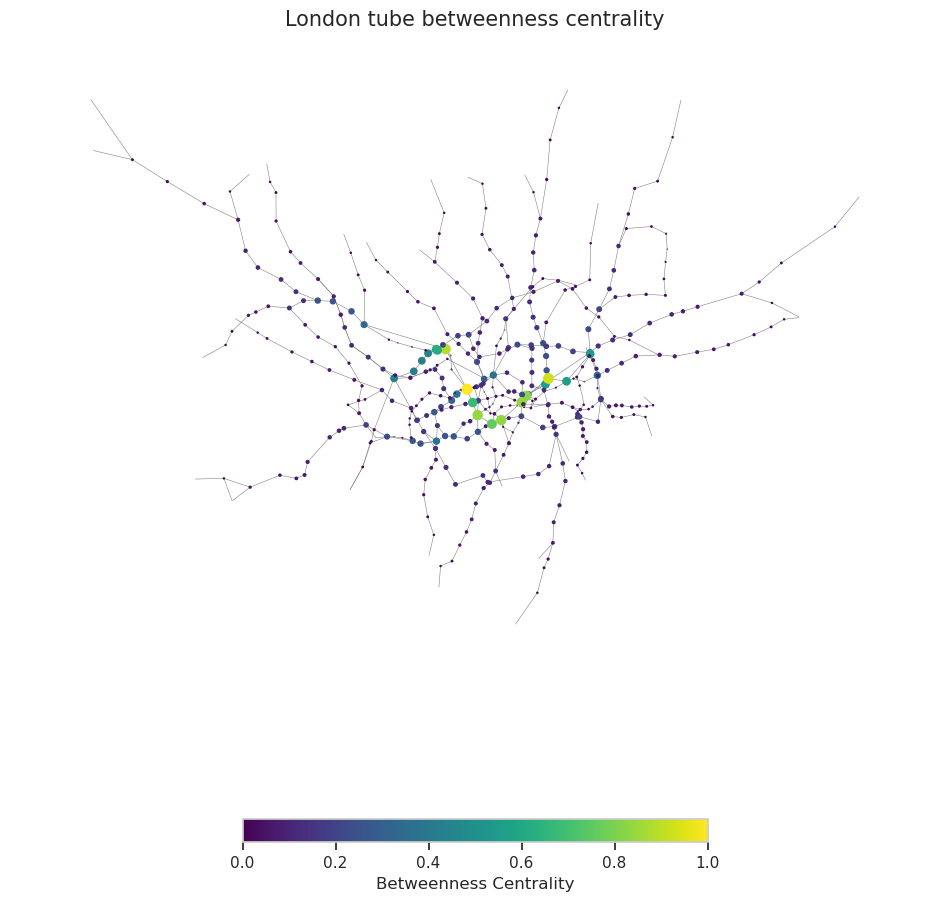

In [120]:
# Set colour and size of nodes according to betweenness values.
betweenness_values = [(i[1]['betweenness']) for i in G.nodes(data=True)]
bet_color = [(i[1]['betweenness']/max(betweenness_values)) for i in G.nodes(data=True)]
bet_size = [(i[1]['betweenness']/max(betweenness_values))*50 for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edge_color='gray', 
                       width=0.4)

nod=nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_color=bet_color, 
                           cmap=plt.cm.viridis, 
                           node_size=bet_size)

plt.colorbar(nod, label="Betweenness Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality", fontsize=15)
plt.show()

#### Closeness Centrality

In [107]:
# Calculate the closeness centrality.
clo_london = nx.closeness_centrality(G)
nx.set_node_attributes(G, clo_london, 'closeness')

In [108]:
# Add closeness centrality to dataframe.
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

df_sorted = df.sort_values(["closeness"], ascending=False)
df_sorted[0:10]

,station_name,degree,betweenness,closeness
940GZZLUGPK,Green Park,0.013730,0.319552,0.094897
940GZZLUBND,Bond Street,0.009153,0.258599,0.093737
940GZZLUWSM,Westminster,0.009153,0.289962,0.093197
940GZZLUBST,Baker Street,0.016018,0.381015,0.092900
940GZZLUWLO,Waterloo,0.013730,0.317216,0.092389
940GZZLUBNK,Bank,0.013730,0.319563,0.092000
940GZZLUOXC,Oxford Circus,0.013730,0.073865,0.091614
940GZZLULVT,Liverpool Street,0.011442,0.313026,0.090010
940GZZLURGP,Regent's Park,0.004577,0.017732,0.089275
940GZZLUFYR,Finchley Road,0.009153,0.336582,0.089165


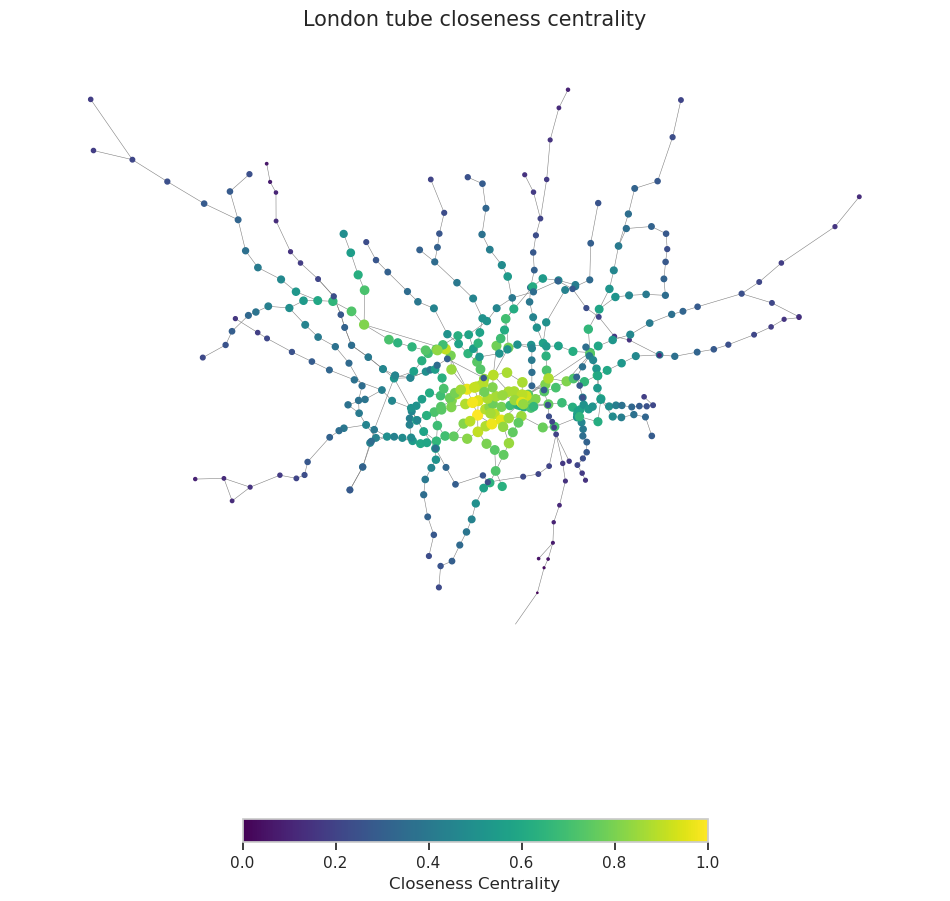

In [121]:
# Set colour and size of nodes according to closeness values.
closeness_values = [(i[1]['closeness']) for i in G.nodes(data=True)]
clo_color = [(i[1]['closeness']-min(closeness_values))/(max(closeness_values)-min(closeness_values)) for i in G.nodes(data=True)]
clo_size = [((i[1]['closeness']-min(closeness_values))/(max(closeness_values)-min(closeness_values))*50) for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=clo_color, 
                             cmap=plt.cm.viridis, 
                             node_size=clo_size)

plt.colorbar(nod, label="Closeness Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube closeness centrality", fontsize=15)
plt.show()

#### Eigenvector Centrality

In [110]:
# Calculate the eigenvector centrality.
egi_london = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, egi_london, 'eigenvector')

In [111]:
# Add eigenvector centrality to dataframe.
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'))

df_sorted = df.sort_values(["eigenvector"], ascending=False)
df_sorted[0:10]

,station_name,degree,betweenness,closeness,eigenvector
940GZZLUOXC,Oxford Circus,0.013730,0.073865,0.091614,0.399218
940GZZLUGPK,Green Park,0.013730,0.319552,0.094897,0.391885
940GZZLUPCC,Piccadilly Circus,0.009153,0.006112,0.087786,0.310514
940GZZLUBND,Bond Street,0.009153,0.258599,0.093737,0.288661
940GZZLUBST,Baker Street,0.016018,0.381015,0.092900,0.220461
940GZZLUWSM,Westminster,0.009153,0.289962,0.093197,0.220367
940GZZLUTCR,Tottenham Court Road,0.009153,0.010858,0.087069,0.210098
940GZZLULSQ,Leicester Square,0.009153,0.002667,0.083845,0.205882
940GZZLUCHX,Charing Cross,0.006865,0.004060,0.086381,0.179887
940GZZLUWLO,Waterloo,0.013730,0.317216,0.092389,0.179239


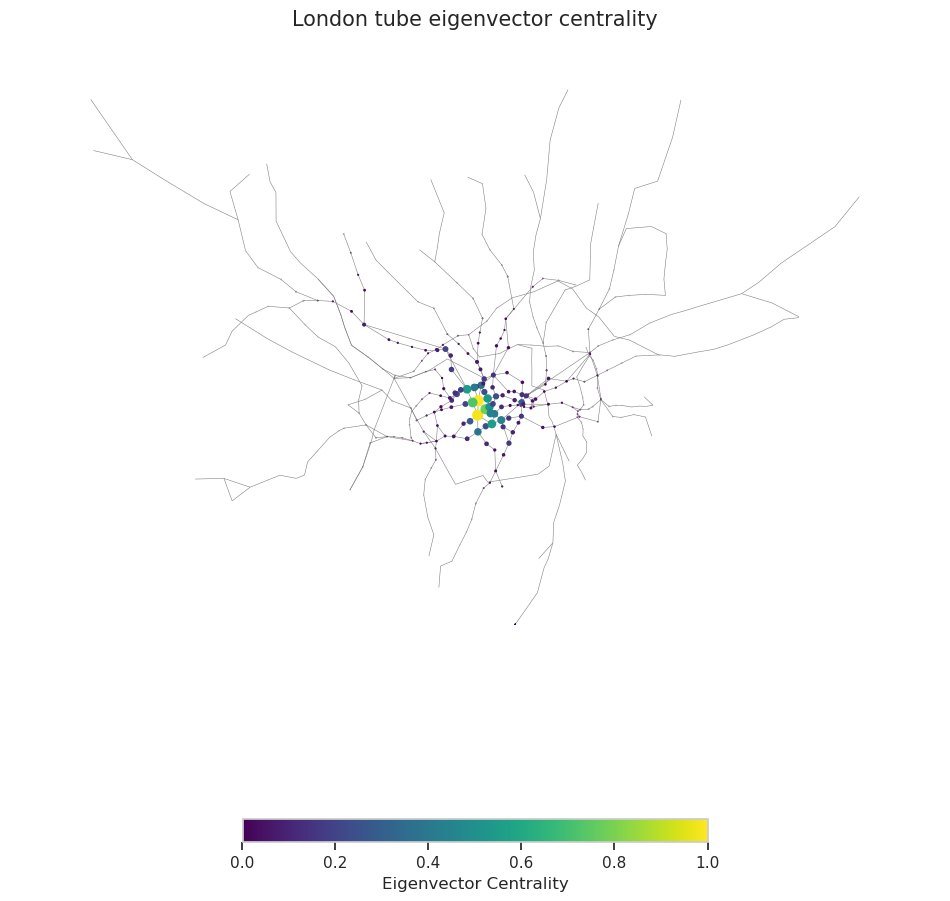

In [123]:
# Set colour and size of nodes according to eigenvector values.
eigenvector_values = [(i[1]['eigenvector']) for i in G.nodes(data=True)]
egi_color = [(i[1]['eigenvector'])/(max(eigenvector_values)) for i in G.nodes(data=True)]
egi_size = [(i[1]['eigenvector'])/(max(eigenvector_values))*50 for i in G.nodes(data=True)]

# Plot graph.
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, 
                       pos, 
                       edge_color='gray', 
                       width=0.4)

nod = nx.draw_networkx_nodes(G, 
                             pos=pos, 
                             node_color=egi_color, 
                             cmap=plt.cm.viridis, 
                             node_size=egi_size)

plt.colorbar(nod, label="Eigenvector Centrality", orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube eigenvector centrality", fontsize=15)
plt.show()

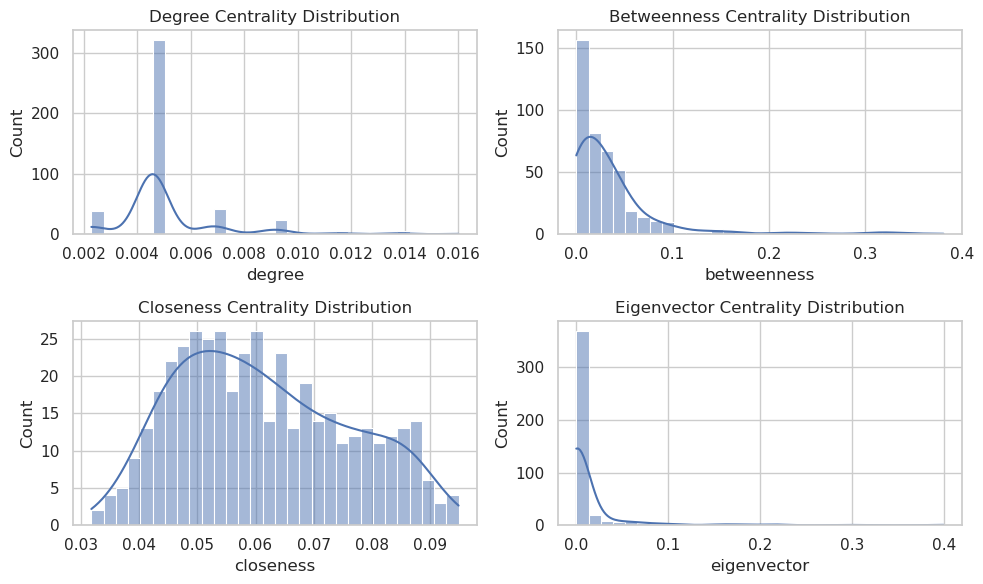

In [122]:
# Plot the distribution of four centralities.
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# degree centrality distribution
sns.histplot(data=df, x="degree", bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Degree Centrality Distribution")

# betweenness centrality distribution
sns.histplot(data=df, x="betweenness", bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Betweenness Centrality Distribution")

# close centrality distribution
sns.histplot(data=df, x="closeness", bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title("Closeness Centrality Distribution")

# eigenvector centrality distribution
sns.histplot(data=df, x="eigenvector", bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title("Eigenvector Centrality Distribution")

plt.tight_layout()
plt.show()

In [124]:
# 对每种中心性进行排序，并提取前十名
top_degree = df.nlargest(10, 'degree')[['station_name', 'degree']]
top_betweenness = df.nlargest(10, 'betweenness')[['station_name', 'betweenness']]
top_closeness = df.nlargest(10, 'closeness')[['station_name', 'closeness']]
top_eigenvector = df.nlargest(10, 'eigenvector')[['station_name', 'eigenvector']]

# 重置索引，以便于合并
top_degree.reset_index(drop=True, inplace=True)
top_betweenness.reset_index(drop=True, inplace=True)
top_closeness.reset_index(drop=True, inplace=True)
top_eigenvector.reset_index(drop=True, inplace=True)

# 合并这四个表格
top_centralities = pd.concat([top_degree, top_betweenness, top_closeness, top_eigenvector], axis=1)

# 给列重命名以反映相应的中心性
top_centralities.columns = ['Station Name (Degree)', 'Degree',
                            'Station Name (Betweenness)', 'Betweenness',
                            'Station Name (Closeness)', 'Closeness',
                            'Station Name (Eigenvector)', 'Eigenvector']

top_centralities

,Station Name (Degree),Degree,Station Name (Betweenness),Betweenness,Station Name (Closeness),Closeness,Station Name (Eigenvector),Eigenvector
0,King's Cross St. Pancras,0.016018,Baker Street,0.381015,Green Park,0.094897,Oxford Circus,0.399218
1,Baker Street,0.016018,Bethnal Green,0.353433,Bond Street,0.093737,Green Park,0.391885
2,Green Park,0.013730,Finchley Road,0.336582,Westminster,0.093197,Piccadilly Circus,0.310514
3,Oxford Circus,0.013730,Bank,0.319563,Baker Street,0.092900,Bond Street,0.288661
4,Earl's Court,0.013730,Green Park,0.319552,Waterloo,0.092389,Baker Street,0.220461
5,Bank,0.013730,Waterloo,0.317216,Bank,0.092000,Westminster,0.220367
6,Waterloo,0.013730,Liverpool Street,0.313026,Oxford Circus,0.091614,Tottenham Court Road,0.210098
7,Turnham Green,0.011442,Westminster,0.289962,Liverpool Street,0.090010,Leicester Square,0.205882
8,Liverpool Street,0.011442,Bond Street,0.258599,Regent's Park,0.089275,Charing Cross,0.179887
9,West Ham,0.011442,West Hampstead,0.236566,Finchley Road,0.089165,Waterloo,0.179239


### I.2. Impact measures

## II. Flows: weighted network

In [ ]:
df_flows = pd.read_csv('london_flows.csv')

In [ ]:
# Delete data rows containing "Battersea".
df_cleaned = df_flows[~df_flows['station_origin'].str.contains("Battersea", na=False) & ~df_flows['station_destination'].str.contains("Battersea", na=False)]

# View cleaned data.
print(df_cleaned.head())